# ML CEP

## Importing required libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import catboost as ctb
# !pip install catboost
# !pip install xgboost
import xgboost as XGB
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import average_precision_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## Exploring the Dataset in Python
### Loading Data

In [2]:
#Loading weather dataset
df=pd.read_csv("weather.csv")

In [3]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [4]:
df.info()    #printing info about df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


# **Data Preprocessing**

### Step1: Removing irrelevant attributes


==> We will remove Formatted Date column since it doesn't really seem to affect the way in which a machine would learn data, atleast to the naked eye.  
==> Loud Cover column will be removed since its value is same for all rows.  
==> Daily Summary Column will also be removed since its redundant, we already have a Summary column.

In [5]:
#confirming that Loud Cover column has same value for all rows
df["Loud Cover"].value_counts()

Loud Cover
0.0    96453
Name: count, dtype: int64

In [6]:
#dropping Loud Cover column from dataset
df.drop(["Loud Cover"], axis=1, inplace=True)

In [7]:
#dropping Formatted Date and Daily Summary Columns
df.drop(["Formatted Date", "Daily Summary"], axis=1,inplace=True)

In [8]:
df=df.reset_index(drop=True)   #resetting index to default integer index
df   #changes incorporated permanently

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


### Step2: Checking for null values (Data Cleaning)

In [9]:
missing=df.isna().sum()   #counting null values in dataset
missing

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

###### As we can see above, Precip Type column has 517 null/missing values, we need to remove those rows with null data. 517 rows are to be removed from a total of 96453 which is 0.53% of total data, remaining no of rows will be 95936.

In [10]:
df.dropna(inplace=True)   #dropping rows with null values in atleast one column

In [11]:
df=df.reset_index(drop=True)   #resetting index
df   #changes incorporated permanently

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
95931,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
95932,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
95933,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
95934,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


### Step3: Checking for duplicate rows (Data Cleaning)

In [12]:
#removing duplicate rows, considering first duplicate row as unique
df.drop_duplicates(keep='first', inplace=True)
df=df.reset_index(drop=True)   #resetting index
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
95859,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
95860,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
95861,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
95862,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


### Step4: Filtering weather dataset by reducing number of classes(min 3) in Summary(target) column.

In [13]:
#checking how many classes are there in Summary attribute
df["Summary"].value_counts()

Summary
Partly Cloudy                          31628
Mostly Cloudy                          27905
Overcast                               16504
Clear                                  10745
Foggy                                   7092
Breezy and Overcast                      527
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [14]:
#Another way to show
Summary_Weather=df["Summary"].value_counts().reset_index()   
Summary_Weather.columns=["Weather Type","Count"]
Summary_Weather

,Weather Type,Count
0,Partly Cloudy,31628
1,Mostly Cloudy,27905
2,Overcast,16504
3,Clear,10745
4,Foggy,7092
5,Breezy and Overcast,527
6,Breezy and Mostly Cloudy,516
7,Breezy and Partly Cloudy,386
8,Dry and Partly Cloudy,86
9,Windy and Partly Cloudy,67


In [15]:
#Mapping Summary(target) variable labels/classes
df['Summary'] = df['Summary'].replace({
    'Partly Cloudy': 'Cloudy',
    'Mostly Cloudy': 'Cloudy',
    'Overcast': 'Cloudy',
    'Clear': 'Clear',
    'Foggy': 'Foggy',
    'Breezy and Overcast': 'Breezy',
    'Breezy and Mostly Cloudy': 'Breezy',
    'Breezy and Partly Cloudy': 'Breezy',
    'Dry and Partly Cloudy': 'Cloudy',
    'Windy and Partly Cloudy': 'Breezy',
    'Light Rain': 'Rain',
    'Breezy': 'Breezy',
    'Windy and Overcast': 'Breezy',
    'Humid and Mostly Cloudy': 'Cloudy',
    'Drizzle': 'Rain',
    'Breezy and Foggy': 'Breezy',
    'Windy and Mostly Cloudy': 'Breezy',
    'Dry': 'Clear',
    'Humid and Partly Cloudy': 'Cloudy',
    'Dry and Mostly Cloudy': 'Cloudy',
    'Rain': 'Rain',
    'Windy': 'Breezy',
    'Humid and Overcast': 'Cloudy',
    'Windy and Foggy': 'Foggy',
    'Windy and Dry': 'Cloudy',
    'Dangerously Windy and Partly Cloudy': 'Breezy',
    'Breezy and Dry': 'Breezy'
})
df['Summary'].value_counts()

Summary
Cloudy    76202
Clear     10779
Foggy      7096
Breezy     1675
Rain        112
Name: count, dtype: int64

##### We are going to predict the 5 classes mapped above in Summary column, namely Cloudy, Clear, Foggy, Breezy and Rain

### Step5: Data Visualisation ==> Checking and removing outliers

#### Checking for outliers by making boxplots for each input variable except Precip Type attribute since it is a categorical variable

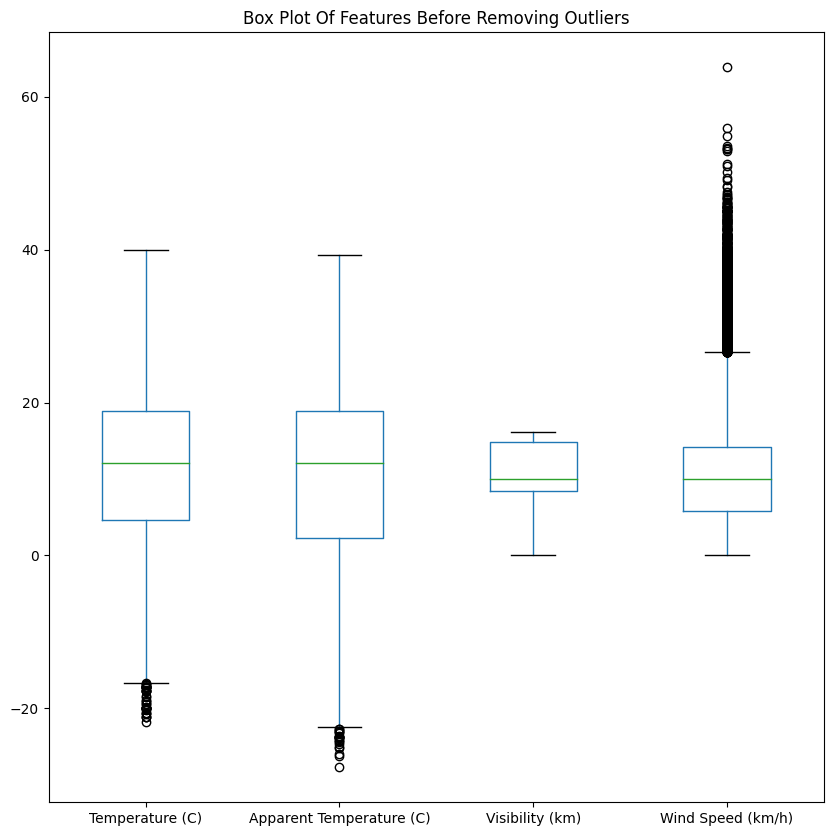

In [16]:
df.boxplot(column =['Temperature (C)','Apparent Temperature (C)','Visibility (km)',
                    'Wind Speed (km/h)'],figsize=(10,10), grid = False)   #constructing boxplot
plt.title('Box Plot Of Features Before Removing Outliers')
plt.show()

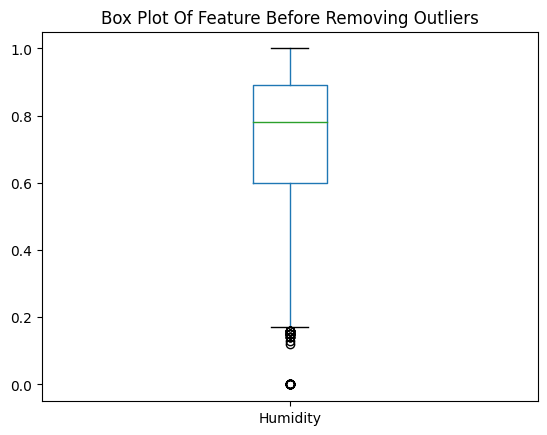

In [17]:
df.boxplot(column =['Humidity'], grid = False)   #constructing boxplot
plt.title('Box Plot Of Feature Before Removing Outliers')
plt.show()

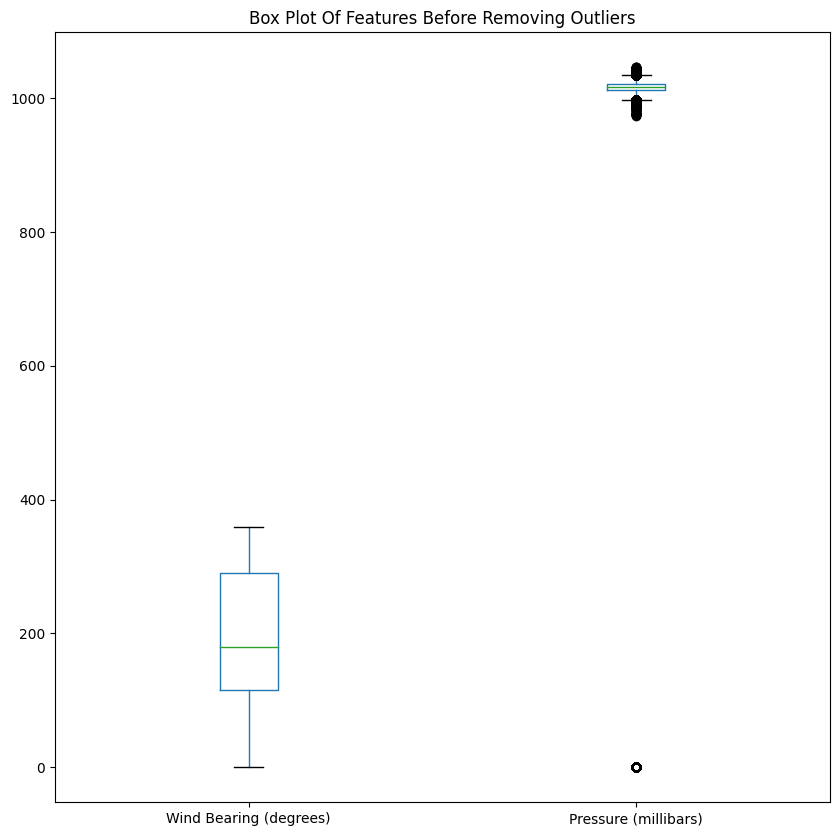

In [18]:
df.boxplot(column =['Wind Bearing (degrees)','Pressure (millibars)'],figsize=(10,10), grid = False)   #constructing boxplot
plt.title('Box Plot Of Features Before Removing Outliers')
plt.show()

#### Removing outliers using InterQuartile method

###### Visibility and Wind Bearing attributes have no outliers as their boxplots show no data points outside the whiskers of the box.

In [19]:
#For Temperatue feature
# Calculate the interquartile range (IQR)
Q1 = df['Temperature (C)'].quantile(0.25)
Q3 = df['Temperature (C)'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for temperature outliers
threshold = 1.5

# Remove temperature outliers from the dataset
df= df[(df['Temperature (C)'] >= Q1 - threshold * IQR) &
                             (df['Temperature (C)'] <= Q3 + threshold * IQR)]

#For Apparent Temperature feature
# Calculate the interquartile range (IQR)
Q1 = df['Apparent Temperature (C)'].quantile(0.25)
Q3 = df['Apparent Temperature (C)'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for apparent temperature outliers
threshold = 1.5

# Remove apparent temperature outliers from the dataset
df= df[(df['Apparent Temperature (C)'] >= Q1 - threshold * IQR) &
                             (df['Apparent Temperature (C)'] <= Q3 + threshold * IQR)]

#For Wind Speed feature
# Calculate the interquartile range (IQR)
Q1 = df['Wind Speed (km/h)'].quantile(0.25)
Q3 = df['Wind Speed (km/h)'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for wind speed outliers
threshold = 1.5

# Remove wind speed outliers from the dataset
df= df[(df['Wind Speed (km/h)'] >= Q1 - threshold * IQR) &
                             (df['Wind Speed (km/h)'] <= Q3 + threshold * IQR)]

#For Humidity feature
# Calculate the interquartile range (IQR)
Q1 = df['Humidity'].quantile(0.25)
Q3 = df['Humidity'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for humidity outliers
threshold = 1.5

# Remove humidity outliers from the dataset
df= df[(df['Humidity'] >= Q1 - threshold * IQR) &
                             (df['Humidity'] <= Q3 + threshold * IQR)]

#For Pressure feature
# Calculate the interquartile range (IQR)
Q1 = df['Pressure (millibars)'].quantile(0.25)
Q3 = df['Pressure (millibars)'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for pressure outliers
threshold = 1.5

# Remove pressure outliers from the dataset
df= df[(df['Pressure (millibars)'] >= Q1 - threshold * IQR) &
                             (df['Pressure (millibars)'] <= Q3 + threshold * IQR)]
df=df.reset_index(drop=True)   #resetting index
df   #after removing outliers

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
88562,Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
88563,Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
88564,Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
88565,Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


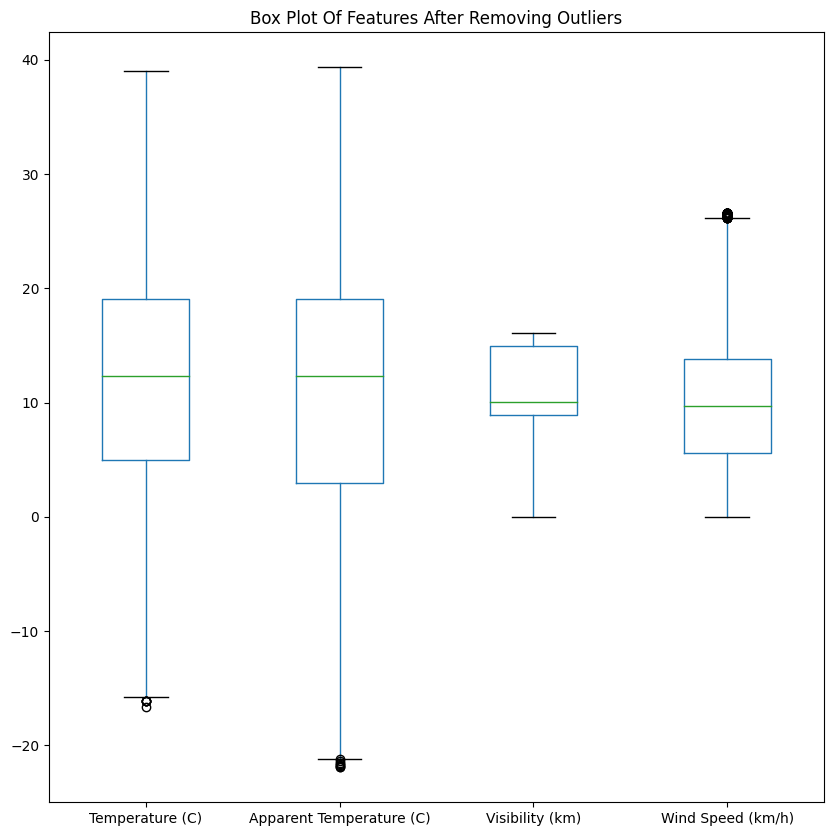

In [20]:
#Making boxplots again to notice difference after removing outliers
df.boxplot(column =['Temperature (C)','Apparent Temperature (C)','Visibility (km)',
                    'Wind Speed (km/h)'],figsize=(10,10), grid = False)   #constructing boxplot
plt.title('Box Plot Of Features After Removing Outliers')
plt.show()

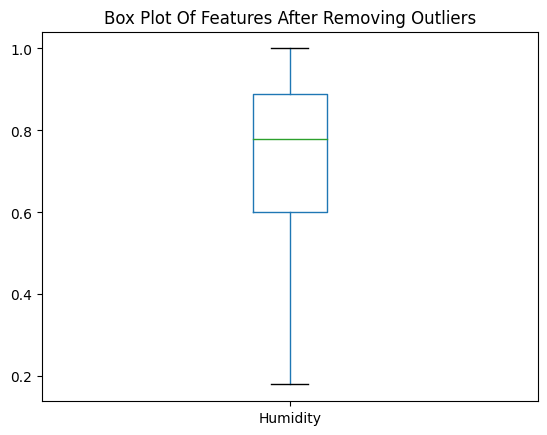

In [21]:
df.boxplot(column =['Humidity'], grid = False)   #constructing boxplot
plt.title('Box Plot Of Features After Removing Outliers')
plt.show()

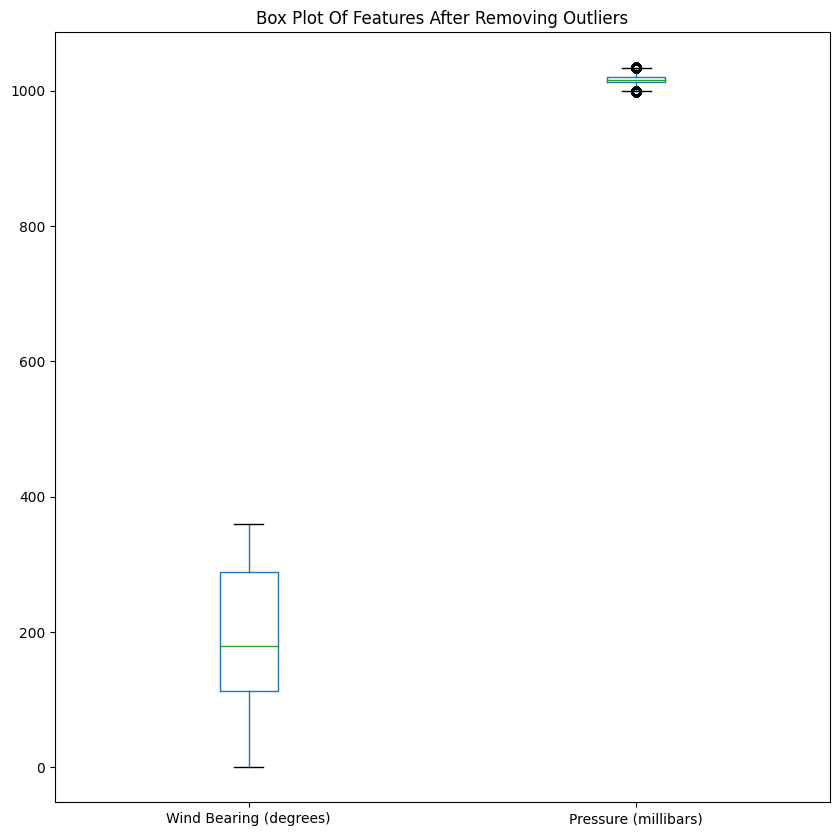

In [22]:
df.boxplot(column =['Wind Bearing (degrees)','Pressure (millibars)'],figsize=(10,10), grid = False)   #constructing boxplot
plt.title('Box Plot Of Features After Removing Outliers')
plt.show()

In [23]:
#checking how many different outcomes there are in Summary (target) variable after removing outliers
df["Summary"].value_counts()

Summary
Cloudy    72535
Clear      9659
Foggy      6270
Rain        103
Name: count, dtype: int64

##### It can be seen above that the number of classes in Summary(target) Column have been reduced to 4 after removing outliers, all records of Breezy Class have been removed.

### Making Histograms, ScatterPlots and CountPlot

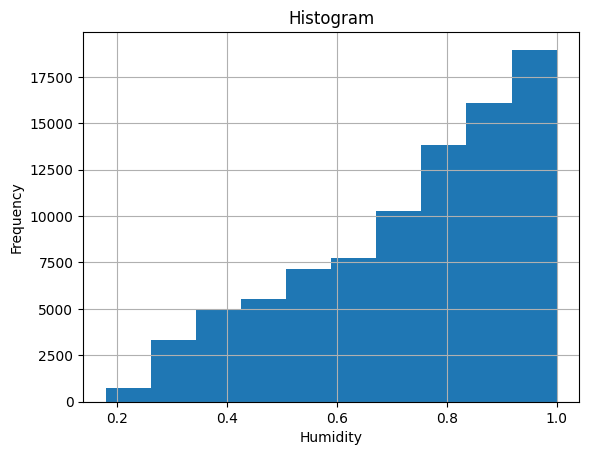

In [24]:
#analysing data
df.hist(column='Humidity')   #histogram
plt.title('Histogram')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

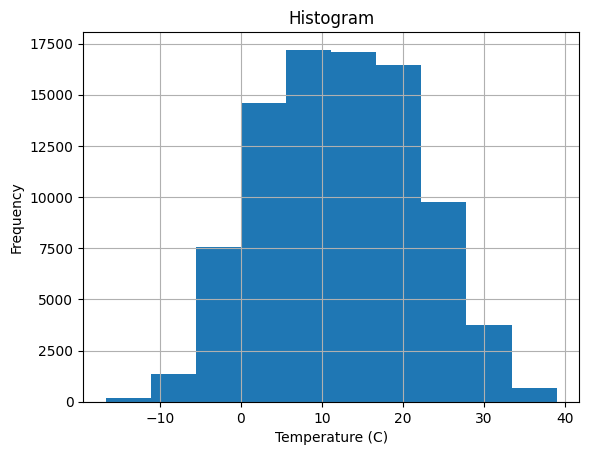

In [25]:
df.hist(column='Temperature (C)')
plt.title('Histogram')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.show()

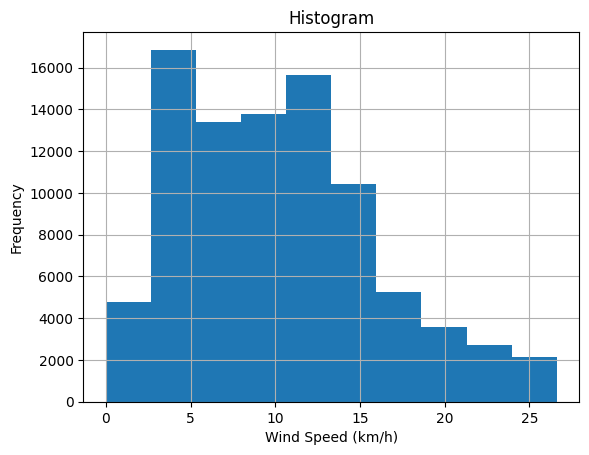

In [26]:
df.hist(column='Wind Speed (km/h)')
plt.title('Histogram')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

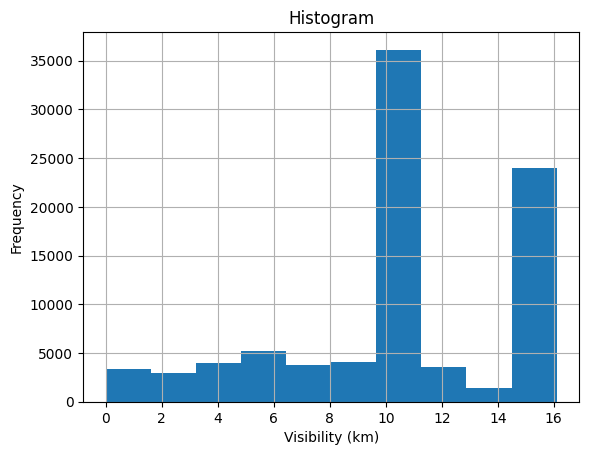

In [27]:
df.hist(column='Visibility (km)')
plt.title('Histogram')
plt.xlabel('Visibility (km)')
plt.ylabel('Frequency')
plt.show()

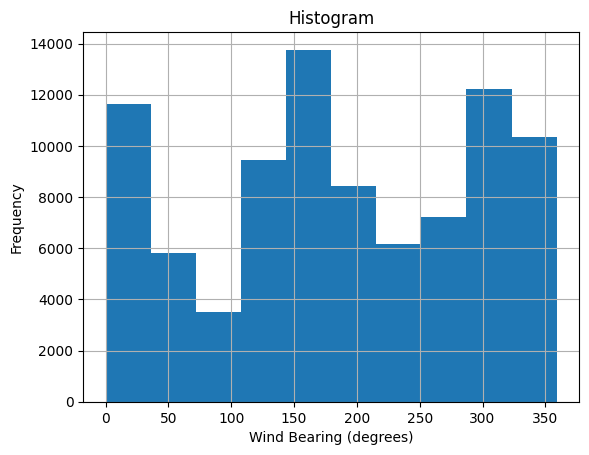

In [28]:
df.hist(column='Wind Bearing (degrees)')
plt.title('Histogram')
plt.xlabel('Wind Bearing (degrees)')
plt.ylabel('Frequency')
plt.show()

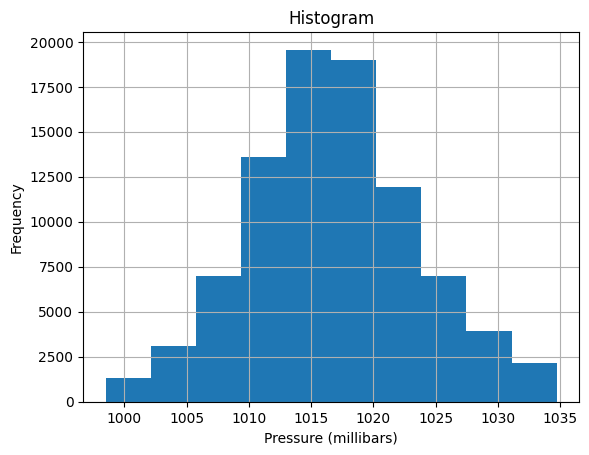

In [29]:
df.hist(column='Pressure (millibars)')
plt.title('Histogram')
plt.xlabel('Pressure (millibars)')
plt.ylabel('Frequency')
plt.show()

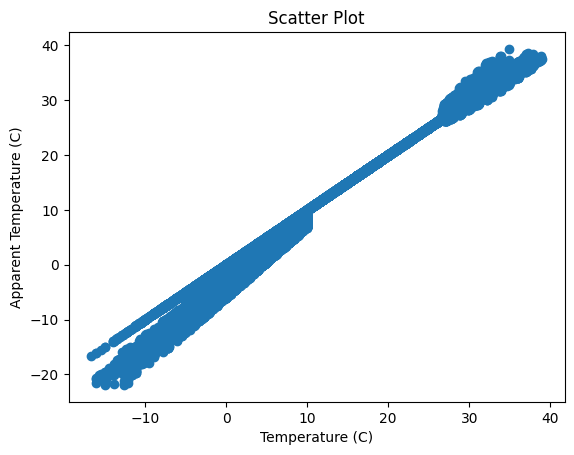

In [30]:
#analysing data
plt.scatter(df["Temperature (C)"], df["Apparent Temperature (C)"])    #scatterplot
plt.title('Scatter Plot')
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')
plt.show()

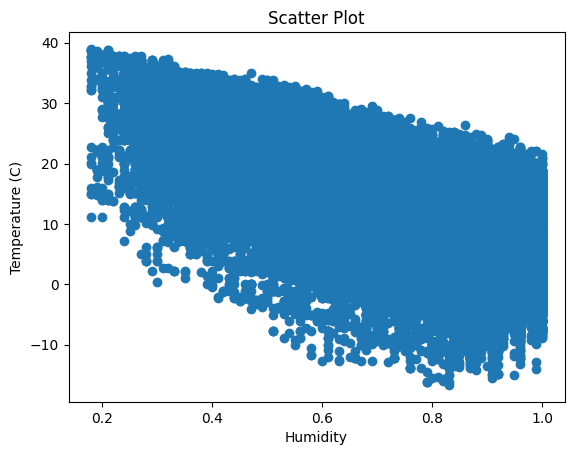

In [31]:
plt.scatter(df["Humidity"], df["Temperature (C)"])
plt.title('Scatter Plot')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.show()

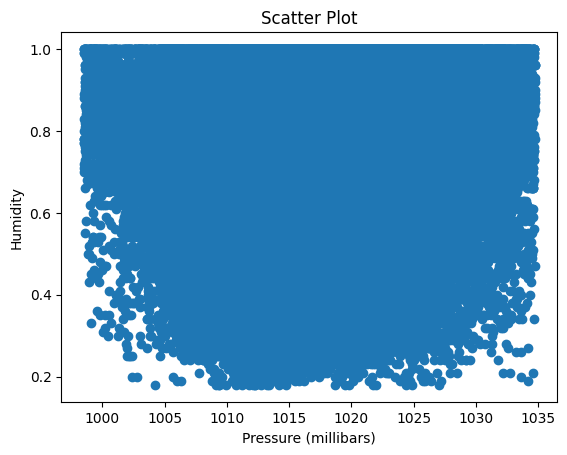

In [32]:
plt.scatter(df["Pressure (millibars)"], df["Humidity"])
plt.title('Scatter Plot')
plt.xlabel('Pressure (millibars)')
plt.ylabel('Humidity')
plt.show()

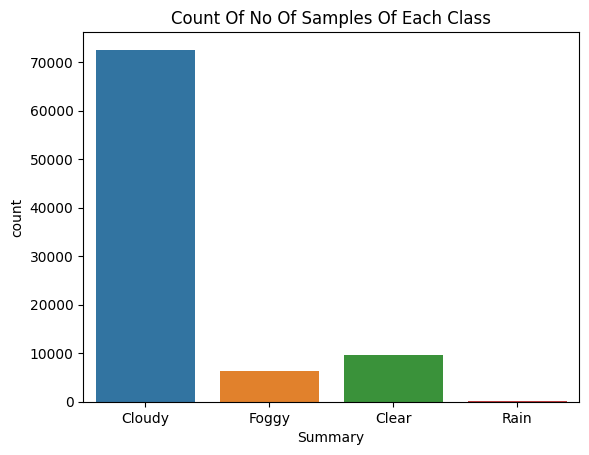

In [33]:
# getting distribution of the target variable
sns.countplot(x="Summary", data = df)               #countplot
plt.title('Count Of No Of Samples Of Each Class')
plt.show()

### Step6: Checking for categorical variables and encoding them

###### It's quite visible that we only have two categorical variable which are "Precip Type" and "Summary" since their datatype is object.

In [34]:
#Checking datatype of every column
df.dtypes

Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
dtype: object

###### Precip Type variable contains binary data i.e it has only two different outcomes(rain, snow) as shown below.

In [35]:
#checking how many different outcomes there are in Precip Type column 
df["Precip Type"].value_counts()
#This shows that there are two possible values for this attribute: 'rain' or 'snow'. 
#Also there are 83365 entries for 'rain' and 10580 entries for 'snow'

Precip Type
rain    79679
snow     8888
Name: count, dtype: int64

In [36]:
#The simplest way to encode 'Precip Type' as dummy variable is to use the replace method. 
df["Precip Type"]=df["Precip Type"].replace('rain',1)
df["Precip Type"]=df["Precip Type"].replace('snow',0)
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Cloudy,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Cloudy,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Cloudy,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Cloudy,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Cloudy,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
88562,Cloudy,1,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
88563,Cloudy,1,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
88564,Cloudy,1,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
88565,Cloudy,1,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [37]:
df["Precip Type"].value_counts()   #changes incorporated

Precip Type
1    79679
0     8888
Name: count, dtype: int64

###### Summary variable contains ordinal data i.e it has only four different outcomes as shown below

In [38]:
#checking how many different outcomes there are in Summary (target) variable 
df["Summary"].value_counts()

Summary
Cloudy    72535
Clear      9659
Foggy      6270
Rain        103
Name: count, dtype: int64

In [39]:
#Applying Label Encoding for Summary variable
le = preprocessing.LabelEncoder()
df["Summary"] = le.fit_transform(df["Summary"])
df["Summary"].unique()
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,1,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,1,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,1,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,1,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,1,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
88562,1,1,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
88563,1,1,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
88564,1,1,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
88565,1,1,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [40]:
df["Summary"].value_counts()   #changes incorporated

Summary
1    72535
0     9659
2     6270
3      103
Name: count, dtype: int64

### Step7: Checking for multicollinearity

In [41]:
#checking/reviewing correlation matrices
corrM = df.corr()
corrM

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Summary,1.000000,-0.155339,-0.191173,-0.187166,0.196997,0.017830,-0.006013,-0.451591,-0.007962
Precip Type,-0.155339,1.000000,0.544717,0.551149,-0.231322,0.050359,0.031024,0.308746,-0.250240
Temperature (C),-0.191173,0.544717,1.000000,0.993507,-0.647109,0.018642,0.025006,0.387789,-0.305008
Apparent Temperature (C),-0.187166,0.551149,0.993507,1.000000,-0.619072,-0.040876,0.025346,0.379954,-0.289419
Humidity,0.196997,-0.231322,-0.647109,-0.619072,1.000000,-0.223436,0.010035,-0.365107,0.034870
Wind Speed (km/h),0.017830,0.050359,0.018642,-0.040876,-0.223436,1.000000,0.081179,0.092267,-0.197187
Wind Bearing (degrees),-0.006013,0.031024,0.025006,0.025346,0.010035,0.081179,1.000000,0.051218,-0.074308
Visibility (km),-0.451591,0.308746,0.387789,0.379954,-0.365107,0.092267,0.051218,1.000000,-0.142798
Pressure (millibars),-0.007962,-0.250240,-0.305008,-0.289419,0.034870,-0.197187,-0.074308,-0.142798,1.000000


As we can observe, there is a strong positive correlation between Temperature and Apparent Temperature features (correlation coefficient = 0.993507). When features are highly correlated, each do not provide unique information and can lead to unreliable estimates, therefore one needs to be removed. In this case, we are going to remove the Apparent Temperature feature.

In [42]:
#removing Apparent Temperature feature from dataset
df.drop(["Apparent Temperature (C)"], axis=1, inplace=True)
df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,1,1,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,1,1,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,1,1,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,1,1,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,1,1,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
88562,1,1,26.016667,0.43,10.9963,31.0,16.1000,1014.36
88563,1,1,24.583333,0.48,10.0947,20.0,15.5526,1015.16
88564,1,1,22.038889,0.56,8.9838,30.0,16.1000,1015.66
88565,1,1,21.522222,0.60,10.5294,20.0,16.1000,1015.95


### Step8: Feature Scaling


In [43]:
df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,1,1,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,1,1,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,1,1,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,1,1,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,1,1,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
88562,1,1,26.016667,0.43,10.9963,31.0,16.1000,1014.36
88563,1,1,24.583333,0.48,10.0947,20.0,15.5526,1015.16
88564,1,1,22.038889,0.56,8.9838,30.0,16.1000,1015.66
88565,1,1,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [44]:
#Dividing data into input and output
inp=df.iloc[:,1:]
out=df.iloc[:,0]

In [45]:
inp

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,1,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,1,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,1,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,1,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,1,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...
88562,1,26.016667,0.43,10.9963,31.0,16.1000,1014.36
88563,1,24.583333,0.48,10.0947,20.0,15.5526,1015.16
88564,1,22.038889,0.56,8.9838,30.0,16.1000,1015.66
88565,1,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [46]:
out

0        1
1        1
2        1
3        1
4        1
        ..
88562    1
88563    1
88564    1
88565    1
88566    1
Name: Summary, Length: 88567, dtype: int32

In [47]:
#Splitting data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inp, out , stratify=out, test_size = 0.2, random_state=0)
print('Training set shape: ', x_train.shape, y_train.shape)
print('Testing set shape: ', x_test.shape, y_test.shape)

Training set shape:  (70853, 7) (70853,)
Testing set shape:  (17714, 7) (17714,)


###### Now we are going to apply Data Scaling and can use either Normalization or Standardization Technique. We will scale the following features: Temperature, Wind Speed, Wind Bearing, Visibility, Pressure.  In case of Normalization,there is no need to normalize Humidity attribute since its values already lie in the range of 0-1 as shown below.

In [48]:
#Checking the min and max value of Humidity column.
print('Minimum value is',df["Humidity"].min())
print('Maximum value is',df["Humidity"].max())

Minimum value is 0.18
Maximum value is 1.0


In [49]:
#Data Scaling
#We will apply normalization which will scale down values of features between zero and one.
# df["Temperature (C)"]=(df["Temperature (C)"]-df["Temperature (C)"].min())/(df["Temperature (C)"].max()-df["Temperature (C)"].min())
# df["Apparent Temperature (C)"]=(df["Apparent Temperature (C)"]-df["Apparent Temperature (C)"].min())/(df["Apparent Temperature (C)"].max()-df["Apparent Temperature (C)"].min())
# df["Wind Speed (km/h)"]=(df["Wind Speed (km/h)"]-df["Wind Speed (km/h)"].min())/(df["Wind Speed (km/h)"].max()-df["Wind Speed (km/h)"].min())
# df["Wind Bearing (degrees)"]=(df["Wind Bearing (degrees)"]-df["Wind Bearing (degrees)"].min())/(df["Wind Bearing (degrees)"].max()-df["Wind Bearing (degrees)"].min())
# df["Visibility (km)"]=(df["Visibility (km)"]-df["Visibility (km)"].min())/(df["Visibility (km)"].max()-df["Visibility (km)"].min())
# df["Pressure (millibars)"]=(df["Pressure (millibars)"]-df["Pressure (millibars)"].min())/(df["Pressure (millibars)"].max()-df["Pressure (millibars)"].min())
# #Let us check the dataset
# df

In [50]:
#Cross-checking the min and max value of the normalized columns now.
# print('Minimum value is',df["Temperature (C)"].min())
# print('Maximum value is',df["Temperature (C)"].max())
# print('Minimum value is',df["Apparent Temperature (C)"].min())
# print('Maximum value is',df["Apparent Temperature (C)"].max())
# print('Minimum value is',df["Wind Speed (km/h)"].min())
# print('Maximum value is',df["Wind Speed (km/h)"].max())
# print('Minimum value is',df["Wind Bearing (degrees)"].min())
# print('Maximum value is',df["Wind Bearing (degrees)"].max())
# print('Minimum value is',df["Visibility (km)"].min())
# print('Maximum value is',df["Visibility (km)"].max())
# print('Minimum value is',df["Pressure (millibars)"].min())
# print('Maximum value is',df["Pressure (millibars)"].max())

##### We are using Standardization technique of Feature Scaling

In [51]:
#Data Scaling
#Applying standardization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# **Implementing Machine learning Algorithms**

In [ ]:
#Training and Testing Model 
#Importing XGBoost Classifier
#Creating object and fitting data onto the model
xg = XGB.XGBClassifier(booster='dart').fit(x_train, y_train)
y_tr=xg.predict(x_train)
y_pred = xg.predict(x_test)
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("\n")
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report"+"\n",classification_report(y_test, y_pred))
weighted_precisions.append(["XGBoost Model", wprec, acc, wrecall, wf1])   #appending models score

### Non-parametric algorithm ==> K-Nearest Neighbors (KNN)

In [52]:
weighted_precisions=[]    #creating empty list which will store weighted_precisions scores of all models

#### We are going to create 4 different models for each algorithm by doing hyperparameter tuning. First, we are going to train and test models individually and after that we are going to look at Grid search cross-validation function which builds multiple models using different combinations of hyperparameters and sees which combination performs the best.

In [53]:
#Training and Testing Model 1
#Importing KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
#Creating object and fitting data onto the model
knn_1=KNeighborsClassifier(n_neighbors=1,metric='minkowski',weights='uniform').fit(x_train,y_train);
y_tr=knn_1.predict(x_train)
y_pred=knn_1.predict(x_test)
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
weighted_precisions.append(["KNN Classifier Model 1", wprec, acc, wrecall, wf1])   #appending models score

Train Accuracy is 100.0%
Test Accuracy is 84.1311956644462%
Weighted Precision Score is 84.61079352202873%
Weighted Recall Score is 84.1311956644462%
Weighted F1 Score is 84.36396122988612%


In [54]:
#Training and Testing Model 2
knn_2=KNeighborsClassifier(n_neighbors=3,metric='euclidean',weights='distance').fit(x_train,y_train);
y_tr=knn_2.predict(x_train)
y_pred=knn_2.predict(x_test)
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")  
weighted_precisions.append(["KNN Classifier Model 2",wprec, acc, wrecall, wf1])  #appending models score

Train Accuracy is 100.0%
Test Accuracy is 86.41187761092921%
Weighted Precision Score is 84.87231249965474%
Weighted Recall Score is 86.41187761092921%
Weighted F1 Score is 85.52121040542112%


In [55]:
#Training and Testing Model 3
knn_3=KNeighborsClassifier(n_neighbors=5,metric='manhattan',weights='uniform').fit(x_train,y_train);
y_tr=knn_3.predict(x_train)
y_pred=knn_3.predict(x_test)
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
weighted_precisions.append(["KNN Classifier Model 3", wprec, acc, wrecall, wf1])   #appending models score

Train Accuracy is 91.19585620933482%
Test Accuracy is 87.41108727560122%
Weighted Precision Score is 84.88348045932193%
Weighted Recall Score is 87.41108727560122%
Weighted F1 Score is 85.68376932852473%


In [56]:
#Training and Testing Model 4
knn_4=KNeighborsClassifier(n_neighbors=8,metric='minkowski',weights='distance').fit(x_train,y_train);
y_tr=knn_4.predict(x_train)
y_pred=knn_4.predict(x_test)
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
weighted_precisions.append(["KNN Classifier Model 4", wprec, acc, wrecall, wf1])   #appending models score

Train Accuracy is 100.0%
Test Accuracy is 87.69899514508298%
Weighted Precision Score is 84.76196785390476%
Weighted Recall Score is 87.69899514508298%
Weighted F1 Score is 85.47437729923614%


#### Hyperparameter tuning using GridSearchCV

In [79]:
from sklearn.model_selection import GridSearchCV
# Defining our possible hyperparameters
grid_hyperparameters_knn = {'n_neighbors': [1,3,5,7], 'metric': ['minkowski','euclidean','manhattan'], 
                         'weights': ['uniform','distance']}
# Searching for best hyperparameters
grid_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid_hyperparameters_knn, cv=3, scoring='accuracy')
grid_knn.fit(inp, out)
# Getting the results
print("Best Score is ",grid_knn.best_score_)
print("Best Estimator is ",grid_knn.best_estimator_)
print("Best Parameter combination is ",grid_knn.best_params_)

Best Score is  0.8478214012359248
Best Estimator is  KNeighborsClassifier(metric='manhattan', n_neighbors=7)
Best Parameter combination is  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


|^| In our example above we have 24 unique combinations of hyperparameters (4 hyperparameter values for n_neighbors times 3 hyperparameter values for metric times 2 hyperparameterp values for weights). For each of these 24 combinations, the 3-fold cross-validation (cv=3) creates 3 models. So in this example, GridSearchCV() creates and evaluates 72 (24x3) models and then then determines the best model out of these 72 and prints the corresponding accuracy and hyperparameters used for that model.

### Parametric algorithm ==> Logistic Regression

In [58]:
#Training and Testing Model 1
#Importing Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression 
#Creating object and fitting data onto the model
logreg_1 = LogisticRegression(solver='sag', multi_class='ovr', penalty='l2').fit(x_train , y_train)
y_tr=logreg_1.predict(x_train)
y_pred=logreg_1.predict(x_test)
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
weighted_precisions.append(["Logistic Regression Model 1", wprec, acc, wrecall, wf1])   #appending models score

Train Accuracy is 88.41404033703584%
Test Accuracy is 88.54578299649994%
Weighted Precision Score is 83.2494330477151%
Weighted Recall Score is 88.54578299649994%
Weighted F1 Score is 83.41783184845455%


In [59]:
#Training and Testing Model 2
logreg_2 = LogisticRegression(solver='liblinear', multi_class='ovr', penalty='l1').fit(x_train , y_train)
y_tr=logreg_2.predict(x_train)
y_pred=logreg_2.predict(x_test)
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
weighted_precisions.append(["Logistic Regression Model 2", wprec, acc, wrecall, wf1])   #appending models score

Train Accuracy is 88.47331799641512%
Test Accuracy is 88.59094501524218%
Weighted Precision Score is 84.375724559691%
Weighted Recall Score is 88.59094501524218%
Weighted F1 Score is 83.45895936683574%


In [60]:
#Training and Testing Model 3
logreg_3 = LogisticRegression(solver='lbfgs', multi_class='multinomial', penalty='l2').fit(x_train , y_train)
y_tr=logreg_3.predict(x_train)
y_pred=logreg_3.predict(x_test)
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
weighted_precisions.append(["Logistic Regression Model 3", wprec, acc, wrecall, wf1])   #appending models score

Train Accuracy is 88.81063610574004%
Test Accuracy is 88.85627187535283%
Weighted Precision Score is 86.91734669021388%
Weighted Recall Score is 88.85627187535283%
Weighted F1 Score is 83.73557236378689%


In [61]:
#Training and Testing Model 4
logreg_4 = LogisticRegression(solver='saga', multi_class='multinomial', penalty='l2').fit(x_train , y_train)
y_tr=logreg_4.predict(x_train)
y_pred=logreg_4.predict(x_test)
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
weighted_precisions.append(["Logistic Regression Model 4", wprec, acc, wrecall, wf1])   #appending models score

Train Accuracy is 88.78240864889277%
Test Accuracy is 88.8619171276956%
Weighted Precision Score is 86.92333945880158%
Weighted Recall Score is 88.8619171276956%
Weighted F1 Score is 83.74113727542844%


#### Hyperparameter tuning using GridSearchCV

In [80]:
# Defining our possible hyperparameters
grid_hyperparameters_logreg = {'solver': ['liblinear','sag','saga'], 'C': [0.01 ,0.1, 1.0], 'penalty': ['l2']}
# Searching for best hyperparameters
grid_logreg = GridSearchCV(estimator=LogisticRegression(), param_grid=grid_hyperparameters_logreg,
                           cv=3, scoring='accuracy')
grid_logreg.fit(inp, out)
# Getting the results
print("Best Score is ",grid_logreg.best_score_)
print("Best Estimator is ",grid_logreg.best_estimator_)
print("Best Parameter combination is ",grid_logreg.best_params_)   

Best Score is  0.8851829826921996
Best Estimator is  LogisticRegression(solver='sag')
Best Parameter combination is  {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}


|^| In our example above we have 9 unique combinations of hyperparameters (3 hyperparameter values for solver times 3 hyperparameter values for C(penalty strength)). For each of these 9 combinations, the 3-fold cross-validation (cv=3) creates 3 models. So in this example, GridSearchCV() creates and evaluates 27(9x3) models and then then determines the best model out of these 27 and prints the corresponding accuracy and hyperparameters used for that model.

### Neural Network Architecture ==> Multilayer Perceptron (MLP)

In [62]:
#Training and Testing Model 1
# Importing MLPClassifer 
from sklearn.neural_network import MLPClassifier
# Create model object and fitting data onto the model
mlp_1 = MLPClassifier(hidden_layer_sizes=(20,20), activation='relu', solver='sgd',
                      learning_rate='adaptive', early_stopping=True).fit(x_train,y_train)
y_tr=mlp_1.predict(x_train)
y_pred=mlp_1.predict(x_test)
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
weighted_precisions.append(["Multilayer Perceptron Model 1", wprec, acc, wrecall, wf1])    #appending models score             

Train Accuracy is 88.78664276741986%
Test Accuracy is 88.8111098566106%
Weighted Precision Score is 85.92576523548907%
Weighted Recall Score is 88.8111098566106%
Weighted F1 Score is 83.74481608218414%


In [63]:
#Training and Testing Model 2
# Create model object and fitting data onto the model
mlp_2 = MLPClassifier(hidden_layer_sizes=(40,40), activation='tanh', solver='sgd',
                      learning_rate='adaptive', early_stopping=True).fit(x_train,y_train)
y_tr=mlp_2.predict(x_train)
y_pred=mlp_2.predict(x_test)
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
weighted_precisions.append(["Multilayer Perceptron Model 2", wprec, acc, wrecall, wf1])   #appending models score               

Train Accuracy is 88.89249573059715%
Test Accuracy is 88.90143389409506%
Weighted Precision Score is 86.44088896656481%
Weighted Recall Score is 88.90143389409506%
Weighted F1 Score is 83.7891503602219%


In [64]:
#Training and Testing Model 3
# Create model object and fitting data onto the model
mlp_3 = MLPClassifier(hidden_layer_sizes=(15,15,15), activation='relu', solver='adam',
                      learning_rate='adaptive', early_stopping=True).fit(x_train,y_train)
y_tr=mlp_3.predict(x_train)
y_pred=mlp_3.predict(x_test)
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
weighted_precisions.append(["Multilayer Perceptron Model 3", wprec, acc, wrecall, wf1])   #appending models score  

Train Accuracy is 88.81063610574004%
Test Accuracy is 88.78288359489669%
Weighted Precision Score is 84.23427655713901%
Weighted Recall Score is 88.78288359489669%
Weighted F1 Score is 83.78510488189917%


In [65]:
#Training and Testing Model 4
# Create model object and fitting data onto the model
mlp_4 = MLPClassifier(hidden_layer_sizes=(25,25,25), activation='relu', solver='adam',
                      learning_rate='adaptive', early_stopping=True).fit(x_train,y_train)
y_tr=mlp_4.predict(x_train)
y_pred=mlp_4.predict(x_test)
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
weighted_precisions.append(["Multilayer Perceptron Model 4",wprec, acc, wrecall, wf1])   #appending models score

Train Accuracy is 88.92495730597152%
Test Accuracy is 88.8675623800384%
Weighted Precision Score is 84.6496942593653%
Weighted Recall Score is 88.8675623800384%
Weighted F1 Score is 84.24223102419279%


#### Hyperparameter tuning using GridSearchCV

In [66]:
# Defining our possible hyperparameters
grid_hyperparameters_mlp = {'activation': ['logistic','tanh','relu'],
                               'solver': ['sgd','adam'], 
                               'learning_rate': ['constant','adaptive']}                              
# Searching for best hyperparameters
grid_mlp = GridSearchCV(estimator=MLPClassifier(), param_grid=grid_hyperparameters_mlp,
                           cv=3, scoring='accuracy')
grid_mlp.fit(inp, out)
# Getting the results
print("Best Score is ",grid_mlp.best_score_)
print("Best Estimator is ",grid_mlp.best_estimator_)
print("Best Parameter combination is ",grid_mlp.best_params_)

|^| In our example above we have 12 unique combinations of hyperparameters (3 hyperparameter values for activation times 2 hyperparameter values for solver times 2 hyperparameter values for learning_rate). For each of these 12 combinations, the 3-fold cross-validation (cv=3) creates 3 models. So in this example, GridSearchCV() creates and evaluates 36 (12x3) models and then then determines the best model out of these 36 and prints the corresponding accuracy and hyperparameters used for that model.

### Tabular Comparison of all 12 implemented models

In [67]:
print('-'*126)
text = "|{:<34}|{:^14}|{:^24}|{:^24}|{:^24}|"
print(text.format("              Models","Accuracy", "Weighted Precision", "Weighted Recall", "Weighted F1-score"))
print('-'*126)

for i in range(len(weighted_precisions)):
    print(text.format("  "+weighted_precisions[i][0], round(float(weighted_precisions[i][2]),3), round(float(weighted_precisions[i][1]),3),round(float(weighted_precisions[i][3]),3),round(float(weighted_precisions[i][4]),3)))
    
print('-'*126)

------------------------------------------------------------------------------------------------------------------------------
|              Models              |   Accuracy   |   Weighted Precision   |    Weighted Recall     |   Weighted F1-score    |
------------------------------------------------------------------------------------------------------------------------------
|  KNN Classifier Model 1          |    0.841     |         0.846          |         0.841          |         0.844          |
|  KNN Classifier Model 2          |    0.864     |         0.849          |         0.864          |         0.855          |
|  KNN Classifier Model 3          |    0.874     |         0.849          |         0.874          |         0.857          |
|  KNN Classifier Model 4          |    0.877     |         0.848          |         0.877          |         0.855          |
|  Logistic Regression Model 1     |    0.885     |         0.832          |         0.885          |         0

### Graphical Comparison of all 12 implemented models on the basis of Weighted Precision

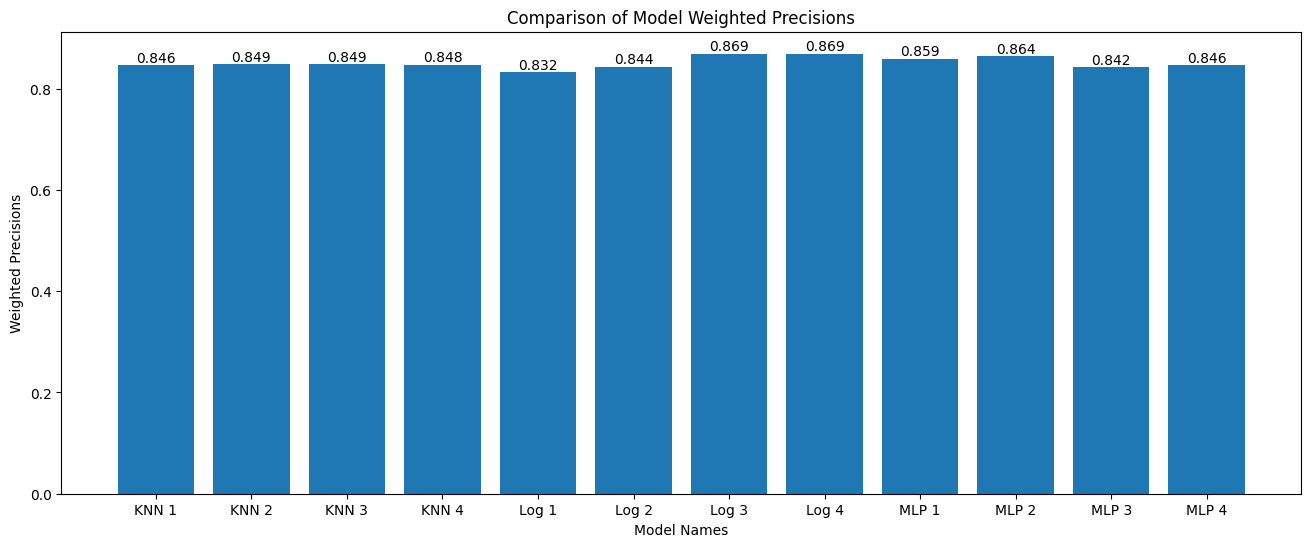

In [68]:
import matplotlib.pyplot as plt
wPrecision=[]
models_names=["KNN 1", "KNN 2", "KNN 3", "KNN 4", "Log 1",  "Log 2",  "Log 3",  "Log 4", "MLP 1", "MLP 2", "MLP 3", "MLP 4"]
for i in weighted_precisions:
    wPrecision.append(float(i[1]))
    
plt.figure(figsize=(16, 6))
plt.bar(models_names, wPrecision)
plt.xlabel('Model Names')
plt.ylabel('Weighted Precisions')
plt.title('Comparison of Model Weighted Precisions')
for i, score in enumerate(wPrecision):
    plt.text(i, score, str(round(float(score), 3)), ha='center', va='bottom')
plt.show()
plt.show()

>We have taken weighted precision as an evaluation metric when comparing our models. Since our dataset is imbalanced, accuracy won't suffice as an appropriate evaluation metric.
it can be observed above that Logistic Regression Model 3 and 4 are the best among the 12 implemented so far when comparing models in terms of weighted precision. The best KNN model is KNN Model 2 and 3. The best MLP model is MLP Model 2

## TRYING MORE ALGORITHMS

### ==> Random Forest

In [69]:
#Training and Testing Model 1
#Importing RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
#Creating object and fitting data onto the model
rf_1=RandomForestClassifier(n_estimators=100, max_depth=80, min_samples_split=6).fit(x_train,y_train)
y_tr=rf_1.predict(x_train)
y_pred = rf_1.predict(x_test)
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
print("Test Accuracy is "  + str (metrics.accuracy_score(y_test, y_pred)*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
target_names = ["Cloudy", "Clear", "Foggy", "Rain"]
print("Classification Report"+"\n",classification_report(y_test, y_pred, target_names=target_names))    

Train Accuracy is 97.72768972379433%
Test Accuracy is 89.36998983854578%


Confusion Matrix 
 [[  163  1767     2     0]
 [   95 14412     0     0]
 [    0     0  1254     0]
 [    0    13     6     2]]


Classification Report
               precision    recall  f1-score   support

      Cloudy       0.63      0.08      0.15      1932
       Clear       0.89      0.99      0.94     14507
       Foggy       0.99      1.00      1.00      1254
        Rain       1.00      0.10      0.17        21

    accuracy                           0.89     17714
   macro avg       0.88      0.54      0.56     17714
weighted avg       0.87      0.89      0.86     17714



In [70]:
#Training and Testing Model 2
#Creating object and fitting data onto the model
rf_2=RandomForestClassifier(n_estimators=200, max_depth=90, min_samples_split=7).fit(x_train,y_train)
y_tr=rf_2.predict(x_train)
y_pred = rf_2.predict(x_test)
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
print("Test Accuracy is "  + str (metrics.accuracy_score(y_test, y_pred)*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
target_names = ["Cloudy", "Clear", "Foggy", "Rain"]
print("Classification Report"+"\n",classification_report(y_test, y_pred, target_names=target_names))

Train Accuracy is 96.80041776636133%
Test Accuracy is 89.39821610025969%


Confusion Matrix 
 [[  157  1771     4     0]
 [   84 14423     0     0]
 [    0     0  1254     0]
 [    0    13     6     2]]


Classification Report
               precision    recall  f1-score   support

      Cloudy       0.65      0.08      0.14      1932
       Clear       0.89      0.99      0.94     14507
       Foggy       0.99      1.00      1.00      1254
        Rain       1.00      0.10      0.17        21

    accuracy                           0.89     17714
   macro avg       0.88      0.54      0.56     17714
weighted avg       0.87      0.89      0.86     17714



In [71]:
#Training and Testing Model 3
#Creating object and fitting data onto the model
rf_3=RandomForestClassifier(n_estimators=300, max_depth=100, min_samples_split=8).fit(x_train,y_train)
y_tr=rf_3.predict(x_train)
y_pred = rf_3.predict(x_test)
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
print("Test Accuracy is "  + str (metrics.accuracy_score(y_test, y_pred)*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
target_names = ["Cloudy", "Clear", "Foggy", "Rain"]
print("Classification Report"+"\n",classification_report(y_test, y_pred, target_names=target_names))

Train Accuracy is 95.95923955231254%
Test Accuracy is 89.35305408151744%


Confusion Matrix 
 [[  141  1788     3     0]
 [   76 14431     0     0]
 [    0     0  1254     0]
 [    0    13     6     2]]


Classification Report
               precision    recall  f1-score   support

      Cloudy       0.65      0.07      0.13      1932
       Clear       0.89      0.99      0.94     14507
       Foggy       0.99      1.00      1.00      1254
        Rain       1.00      0.10      0.17        21

    accuracy                           0.89     17714
   macro avg       0.88      0.54      0.56     17714
weighted avg       0.87      0.89      0.85     17714



In [72]:
#Training and Testing Model 4
#Creating object and fitting data onto the model
rf_4=RandomForestClassifier(n_estimators=150, max_depth=110, min_samples_split=10).fit(x_train,y_train)
y_tr=rf_4.predict(x_train)
y_pred = rf_4.predict(x_test)
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
print("Test Accuracy is "  + str (metrics.accuracy_score(y_test, y_pred)*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
target_names = ["Cloudy", "Clear", "Foggy", "Rain"]
print("Classification Report"+"\n",classification_report(y_test, y_pred, target_names=target_names))

Train Accuracy is 94.6240808434364%
Test Accuracy is 89.38692559557411%


Confusion Matrix 
 [[  137  1793     2     0]
 [   66 14441     0     0]
 [    0     0  1254     0]
 [    0    13     6     2]]


Classification Report
               precision    recall  f1-score   support

      Cloudy       0.67      0.07      0.13      1932
       Clear       0.89      1.00      0.94     14507
       Foggy       0.99      1.00      1.00      1254
        Rain       1.00      0.10      0.17        21

    accuracy                           0.89     17714
   macro avg       0.89      0.54      0.56     17714
weighted avg       0.87      0.89      0.85     17714



#### Hyperparameter tuning using GridSearchCV

In [73]:
# Defining our possible hyperparameters
grid_hyperparameters_rf = {'n_estimators': [100,200,300],'max_depth': [80,90,100],
                            'min_samples_split': [3,6]}
# Searching for best hyperparameters
grid_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_hyperparameters_rf,
                           cv=3, scoring='accuracy')
grid_rf.fit(inp, out)
# Getting the results
print("Best Score is ",grid_rf.best_score_)
print("Best Estimator is ",grid_rf.best_estimator_)
print("Best Parameter combination is ",grid_rf.best_params_)

|^| In our example above we have 18 unique combinations of hyperparameters (3 hyperparameter values for n_estimators times 3 hyperparameter values for max_depth times 2 hyperparameter values for min_samples_split). For each of these 18 combinations, the 3-fold cross-validation (cv=3) creates 3 models. So in this example, GridSearchCV() creates and evaluates 54 (18x3) models and then then determines the best model out of these 54 and prints the corresponding accuracy and hyperparameters used for that model.

### ==> CatBoost

In [74]:
#Training and Testing Model 1
#Importing CatBoost Classifier
from catboost import CatBoostClassifier
#Creating object and fitting data onto the model
cat_1 = CatBoostClassifier(iterations=250, eval_metric = "MultiClass").fit(x_train, y_train)
y_tr=cat_1.predict(x_train)
y_pred = cat_1.predict(x_test)
print("\n")
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
print("Test Accuracy is "  + str (metrics.accuracy_score(y_test, y_pred)*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
target_names = ["Cloudy", "Clear", "Foggy", "Rain"]
print("Classification Report"+"\n",classification_report(y_test, y_pred, target_names=target_names))

Learning rate set to 0.317272
0:	learn: 0.8113539	total: 196ms	remaining: 48.9s
1:	learn: 0.6229159	total: 230ms	remaining: 28.6s
2:	learn: 0.5206668	total: 263ms	remaining: 21.6s
3:	learn: 0.4565801	total: 294ms	remaining: 18.1s
4:	learn: 0.4121238	total: 327ms	remaining: 16s
5:	learn: 0.3816941	total: 359ms	remaining: 14.6s
6:	learn: 0.3607404	total: 392ms	remaining: 13.6s
7:	learn: 0.3461064	total: 423ms	remaining: 12.8s
8:	learn: 0.3346710	total: 451ms	remaining: 12.1s
9:	learn: 0.3262384	total: 485ms	remaining: 11.6s
10:	learn: 0.3198209	total: 517ms	remaining: 11.2s
11:	learn: 0.3144541	total: 549ms	remaining: 10.9s
12:	learn: 0.3105014	total: 582ms	remaining: 10.6s
13:	learn: 0.3072603	total: 612ms	remaining: 10.3s
14:	learn: 0.3056840	total: 640ms	remaining: 10s
15:	learn: 0.3040134	total: 669ms	remaining: 9.79s
16:	learn: 0.3028652	total: 699ms	remaining: 9.58s
17:	learn: 0.3016334	total: 731ms	remaining: 9.42s
18:	learn: 0.3003953	total: 765ms	remaining: 9.3s
19:	learn: 0.299

In [75]:
#Training and Testing Model 2
#Creating object and fitting data onto the model
cat_2 = CatBoostClassifier(iterations=500, eval_metric = "Accuracy").fit(x_train, y_train)
y_tr=cat_2.predict(x_train)
y_pred = cat_2.predict(x_test)
print("\n")
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
print("Test Accuracy is "  + str (metrics.accuracy_score(y_test, y_pred)*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
target_names = ["Cloudy", "Clear", "Foggy", "Rain"]
print("Classification Report"+"\n",classification_report(y_test, y_pred, target_names=target_names))

Learning rate set to 0.176629
0:	learn: 0.8861587	total: 38.3ms	remaining: 19.1s
1:	learn: 0.8861587	total: 73.6ms	remaining: 18.3s
2:	learn: 0.8873866	total: 109ms	remaining: 18s
3:	learn: 0.8873866	total: 141ms	remaining: 17.5s
4:	learn: 0.8873866	total: 175ms	remaining: 17.3s
5:	learn: 0.8887838	total: 207ms	remaining: 17.1s
6:	learn: 0.8888544	total: 240ms	remaining: 16.9s
7:	learn: 0.8888544	total: 271ms	remaining: 16.7s
8:	learn: 0.8888685	total: 305ms	remaining: 16.6s
9:	learn: 0.8888826	total: 338ms	remaining: 16.6s
10:	learn: 0.8893343	total: 370ms	remaining: 16.4s
11:	learn: 0.8895883	total: 402ms	remaining: 16.3s
12:	learn: 0.8896024	total: 432ms	remaining: 16.2s
13:	learn: 0.8896165	total: 464ms	remaining: 16.1s
14:	learn: 0.8896165	total: 494ms	remaining: 16s
15:	learn: 0.8895742	total: 527ms	remaining: 15.9s
16:	learn: 0.8895601	total: 560ms	remaining: 15.9s
17:	learn: 0.8895742	total: 592ms	remaining: 15.8s
18:	learn: 0.8897436	total: 622ms	remaining: 15.7s
19:	learn: 0.

In [76]:
#Training and Testing Model 3
#Creating object and fitting data onto the model
cat_3 = CatBoostClassifier(iterations=750, eval_metric = "MultiClass").fit(x_train, y_train)
y_tr=cat_3.predict(x_train)
y_pred = cat_3.predict(x_test)
print("\n")
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
print("Test Accuracy is "  + str (metrics.accuracy_score(y_test, y_pred)*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
target_names = ["Cloudy", "Clear", "Foggy", "Rain"]
print("Classification Report"+"\n",classification_report(y_test, y_pred, target_names=target_names))

Learning rate set to 0.125391
0:	learn: 1.1272332	total: 35.9ms	remaining: 26.9s
1:	learn: 0.9614242	total: 71.1ms	remaining: 26.6s
2:	learn: 0.8431529	total: 107ms	remaining: 26.6s
3:	learn: 0.7539764	total: 139ms	remaining: 26s
4:	learn: 0.6825476	total: 170ms	remaining: 25.4s
5:	learn: 0.6249959	total: 198ms	remaining: 24.6s
6:	learn: 0.5780454	total: 228ms	remaining: 24.2s
7:	learn: 0.5403083	total: 260ms	remaining: 24.1s
8:	learn: 0.5074930	total: 292ms	remaining: 24s
9:	learn: 0.4802482	total: 324ms	remaining: 24s
10:	learn: 0.4574153	total: 355ms	remaining: 23.9s
11:	learn: 0.4376815	total: 384ms	remaining: 23.6s
12:	learn: 0.4214806	total: 405ms	remaining: 22.9s
13:	learn: 0.4075388	total: 436ms	remaining: 22.9s
14:	learn: 0.3953234	total: 462ms	remaining: 22.7s
15:	learn: 0.3840297	total: 489ms	remaining: 22.4s
16:	learn: 0.3746556	total: 518ms	remaining: 22.3s
17:	learn: 0.3663844	total: 550ms	remaining: 22.4s
18:	learn: 0.3594932	total: 580ms	remaining: 22.3s
19:	learn: 0.35

In [77]:
#Training and Testing Model 4
#Creating object and fitting data onto the model
cat_4 = CatBoostClassifier(iterations=1000, eval_metric = "Accuracy").fit(x_train, y_train)
y_tr=cat_4.predict(x_train)
y_pred = cat_4.predict(x_test)
print("\n")
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
print("Test Accuracy is "  + str (metrics.accuracy_score(y_test, y_pred)*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
target_names = ["Cloudy", "Clear", "Foggy", "Rain"]
print("Classification Report"+"\n",classification_report(y_test, y_pred, target_names=target_names))  

Learning rate set to 0.098331
0:	learn: 0.8861587	total: 39ms	remaining: 39s
1:	learn: 0.8861587	total: 74.2ms	remaining: 37s
2:	learn: 0.8873866	total: 107ms	remaining: 35.6s
3:	learn: 0.8873866	total: 138ms	remaining: 34.4s
4:	learn: 0.8883604	total: 169ms	remaining: 33.7s
5:	learn: 0.8888544	total: 200ms	remaining: 33.1s
6:	learn: 0.8888544	total: 230ms	remaining: 32.6s
7:	learn: 0.8888544	total: 265ms	remaining: 32.9s
8:	learn: 0.8888544	total: 295ms	remaining: 32.5s
9:	learn: 0.8892778	total: 328ms	remaining: 32.5s
10:	learn: 0.8895601	total: 361ms	remaining: 32.5s
11:	learn: 0.8895742	total: 394ms	remaining: 32.4s
12:	learn: 0.8895742	total: 417ms	remaining: 31.7s
13:	learn: 0.8895742	total: 450ms	remaining: 31.7s
14:	learn: 0.8895601	total: 479ms	remaining: 31.4s
15:	learn: 0.8895742	total: 510ms	remaining: 31.3s
16:	learn: 0.8895742	total: 542ms	remaining: 31.3s
17:	learn: 0.8895742	total: 576ms	remaining: 31.4s
18:	learn: 0.8895742	total: 610ms	remaining: 31.5s
19:	learn: 0.88

#### Hyperparameter tuning using GridSearchCV

In [78]:
# Defining our possible hyperparameters
grid_hyperparameters_cat = {'iterations': [100,200,300],'eval_metric': ['MultiClass','Accuracy','Cross Entropy'],
                            'learning_rate': [0.01,0.1]}
# Searching for best hyperparameters
grid_cat = GridSearchCV(estimator=CatBoostClassifier(), param_grid=grid_hyperparameters_cat,
                           cv=3, scoring='accuracy')
grid_cat.fit(inp, out)
# Getting the results
print("Best Score is ",grid_cat.best_score_)
print("Best Estimator is ",grid_cat.best_estimator_)
print("Best Parameter combination is ",grid_cat.best_params_)

0:	learn: 1.3639485	total: 32.8ms	remaining: 3.25s
1:	learn: 1.3425265	total: 61.7ms	remaining: 3.02s
2:	learn: 1.3220687	total: 90.3ms	remaining: 2.92s
3:	learn: 1.3020659	total: 118ms	remaining: 2.84s
4:	learn: 1.2826800	total: 146ms	remaining: 2.77s
5:	learn: 1.2639452	total: 172ms	remaining: 2.7s
6:	learn: 1.2457661	total: 197ms	remaining: 2.62s
7:	learn: 1.2283290	total: 225ms	remaining: 2.59s
8:	learn: 1.2113118	total: 252ms	remaining: 2.55s
9:	learn: 1.1948295	total: 277ms	remaining: 2.5s
10:	learn: 1.1787733	total: 304ms	remaining: 2.46s
11:	learn: 1.1630858	total: 329ms	remaining: 2.42s
12:	learn: 1.1479691	total: 346ms	remaining: 2.31s
13:	learn: 1.1332800	total: 375ms	remaining: 2.3s
14:	learn: 1.1190361	total: 401ms	remaining: 2.27s
15:	learn: 1.1049603	total: 427ms	remaining: 2.24s
16:	learn: 1.0913720	total: 453ms	remaining: 2.21s
17:	learn: 1.0782558	total: 481ms	remaining: 2.19s
18:	learn: 1.0653913	total: 510ms	remaining: 2.17s
19:	learn: 1.0527518	total: 536ms	remaini

|^| In our example above we have 18 unique combinations of hyperparameters (3 hyperparameter values for iterations times 3 hyperparameter values for eval_metric times 2 hyperparameter values for learning_rate). For each of these 18 combinations, the 3-fold cross-validation (cv=3) creates 3 models. So in this example, GridSearchCV() creates and evaluates 54 (18x3) models and then then determines the best model out of these 54 and prints the corresponding accuracy and hyperparameters used for that model.

### USER INTERFACE

In [81]:
target_variables={0:'Clear', 1:'Cloudy', 2:'Foggy', 3:'Rain'}

In [82]:
def logisticRegression(user_values):
    weather_prediction=logreg_4.predict(np.array([user_values]))
    print("Prediction using Logistic Regression : ", target_variables[weather_prediction[0]])

In [83]:
def knnClassifier(user_values):
    weather_prediction=knn_4.predict(np.array([user_values]))
    print("Prediction using KNN Classifier : ", target_variables[weather_prediction[0]])

In [84]:
def mlp(user_values):
    weather_prediction=mlp_4.predict(np.array([user_values]))
    print("Prediction using Multilayer Perceptron : ", target_variables[weather_prediction[0]])

In [85]:
def randomForest(user_values):
    weather_prediction=rf_3.predict(np.array([user_values]))
    print("Prediction using Random Forest : ", target_variables[weather_prediction[0]])

In [86]:
def catBoost(user_values):
    weather_prediction=cat_4.predict(np.array([user_values]))
    print("Prediction using CatBoost : ", target_variables[weather_prediction[0][0]])

In [88]:
print("Welcome To Our Weather Prediction Program : ")
print()
print("Here you will answer some of our questions in numbers only :")
print()
wind_speed=float(input("What is the Wind Speed (km\h) in your area : "))
wind_bearing=float(input("What is the Wind Bearing (degrees) in your area : "))
precip_type=float(input("What is the Precip Type (Rain or Snow) in your area : \nFor Rain Press 1, For Snow Press 0 : "))
humidity=float(input("What is the Humidity in your area : "))
temperature=float(input("What is the Temperature (C) in your area : "))
# apparent_temperature=float(input("What is the Apparent Temperature (C) in your area : "))
visibility=float(input("What is the Visibility (km) in your area : "))
pressure=float(input("What is the Pressure (millibars) in your area : "))

values=np.array([precip_type, temperature, humidity, wind_speed, wind_bearing, visibility, pressure])
print()
choose=input("Which Model you would like to test : \n-->Press 1 for Logistic Regression"+
             "\n-->Press 2 for KNN Classifier\n-->Press 3 for Multilayer Perceptron\n-->Press 4 for Random Forest\n-->Press 5 for CatBoost\n-->Press any other key for Exit\nEnter your option : ")
print()

print("-"*46)
text="|{:^28}|{:^15}|"
print(text.format("Parameters", "Values"))
print("-"*46)
print(text.format("Precip Type", precip_type))
print(text.format("Temperature (C)", temperature))
# print(text.format("Apparent Temperature (C)", apparent_temperature))
print(text.format("Wind Speed (km\h)", wind_speed))
print(text.format("Wind Bearing (degrees)", wind_bearing))
print(text.format("Humidity", humidity))
print(text.format("Visibility (km)", visibility))
print(text.format("Pressure (millibars)", pressure))
print("-"*46)
print()

if(choose=='1'):
    logisticRegression(values)
    print("Thank you! For participating in our program...")
elif(choose=='2'):
    knnClassifier(values)
    print("Thank you! For participating in our program...")
elif(choose=='3'):
    mlp(values)
    print("Thank you! For participating in our program...")
elif(choose=='4'):
    randomForest(values)
    print("Thank you! For participating in our program...")
elif(choose=='5'):
    catBoost(values)
    print("Thank you! For participating in our program...")
else:
    print("Thank you! For participating in our program...")



Welcome To Our Weather Prediction Program : 

Here you will answer some of our questions in numbers only :

What is the Wind Speed (km\h) in your area : 14.11
What is the Wind Bearing (degrees) in your area : 251
What is the Precip Type (Rain or Snow) in your area : 
For Rain Press 1, For Snow Press 0 : 1
What is the Humidity in your area : 0.89
What is the Temperature (C) in your area : 9.47222
What is the Visibility (km) in your area : 15.8263
What is the Pressure (millibars) in your area : 1015.13

Which Model you would like to test : 
-->Press 1 for Logistic Regression
-->Press 2 for KNN Classifier
-->Press 3 for Multilayer Perceptron
-->Press 4 for Random Forest
-->Press 5 for CatBoost
-->Press any other key for Exit
Enter your option : 2

----------------------------------------------
|         Parameters         |    Values     |
----------------------------------------------
|        Precip Type         |      1.0      |
|      Temperature (C)       |    9.47222    |
|     Wind